<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/EscVM/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 422, done.
remote: Total 422 (delta 0), reused 0 (delta 0), pack-reused 422
Receiving objects: 100% (422/422), 34.08 MiB | 38.86 MiB/s, done.
Resolving deltas: 100% (146/146), done.


In [ ]:
# !cd OIDv4_ToolKit && pip install -r requirements.txt

In [ ]:
# !cd OIDv4_ToolKit && python main.py

In [ ]:
# !cd OIDv4_ToolKit && python3 main.py downloader --Dataset /content --classes Car Boat Airplane --type_csv train --limit 200

In [ ]:
# !pip install fastai==2.5.3

In [ ]:
from fastai.vision.all import *
from ipywidgets import *

In [ ]:
path = Path('train')
path.ls()
fls = get_image_files(path)
failed = verify_images(path)

block = DataBlock(
    blocks =(ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2,seed=42),
    get_y = parent_label,
    item_tfms = Resize(224)
)

zip argument #1 must support iteration


In [ ]:
dls = block.dataloaders(path)

In [ ]:
dls.train.show_batch(max_n=16,nrows=4)

In [ ]:
learn = cnn_learner(dls,resnet34,metrics=accuracy)
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.649977,0.421674,0.833333,00:11


epoch,train_loss,valid_loss,accuracy,time
0,0.310968,0.343453,0.891667,00:11
1,0.262223,0.405680,0.875000,00:11
2,0.218396,0.494224,0.883333,00:11
3,0.171450,0.503335,0.883333,00:11


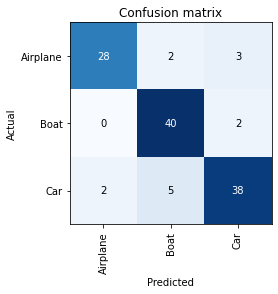

In [ ]:
classs = ClassificationInterpretation.from_learner(learn)
classs.plot_confusion_matrix()

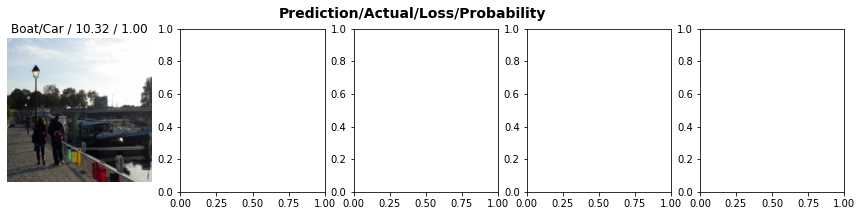

In [ ]:
classs.plot_top_losses(5,nrows=1)

In [ ]:
upload = widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Prediction: Airplane
Probability: 99.7%


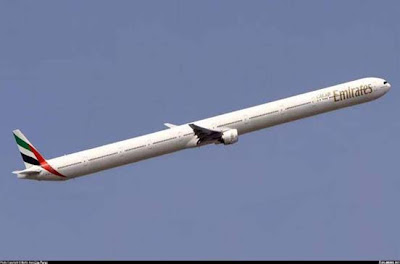

In [ ]:
img = PILImage.create(upload.data[-1])
pred,pred_id,probs = learn.predict(img)
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_id]*100:.1f}%")
img

In [ ]:
learn.export('transport_class_model.pkl')